In [13]:
import sys
sys.path.append('../')
from _imports import *

In [14]:
train_X: np.ndarray = pd.read_csv('../data/preprocess/train_X.csv').to_numpy()
test_X: np.ndarray = pd.read_csv('../data/preprocess/test_X.csv').to_numpy()
train_y: np.ndarray = pd.read_csv('../data/preprocess/train_y.csv').iloc[:, 0].to_numpy()

In [15]:
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs):
        self.rates.append(self.model.optimizer.learning_rate.numpy())
        self.losses.append(logs["loss"])
        self.model.optimizer.learning_rate.assign(self.model.optimizer.learning_rate.numpy() * self.factor)

In [16]:
n_features = train_X.shape[1]

model = keras.Sequential([
    keras.layers.Input(shape=(n_features,), name='input'),
    keras.layers.Dense(
        500, activation='relu',
        kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=keras.regularizers.L2(1e-4),
        activity_regularizer=keras.regularizers.L2(1e-5),
        name='hidden1',
    ),
    keras.layers.Dropout(0.01, seed=101, name='dropout1'),
    keras.layers.Dense(
        500, activation='relu',
        kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=keras.regularizers.L2(1e-4),
        activity_regularizer=keras.regularizers.L2(1e-5),
        name='hidden3',
    ),
    keras.layers.Dropout(0.01, seed=103, name='dropout3'),
    keras.layers.Dense(1, activation='linear', name='output')
], name='model')

model.compile(
    loss=keras.losses.MeanSquaredError(name='MSE'),
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=[
        keras.metrics.RootMeanSquaredError(name='RMSE'),
        keras.metrics.MeanAbsoluteError(name='MAE'),
    ],
)

expon_lr = ExponentialLearningRate(factor=1.005)

In [27]:
keras.utils.set_random_seed(0)

model.fit(
    train_X,
    train_y,
    epochs=10,
    batch_size=8,
    callbacks=[expon_lr],
);

Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - MAE: nan - RMSE: nan - loss: nan
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - MAE: nan - RMSE: nan - loss: nan
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - MAE: nan - RMSE: nan - loss: nan
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - MAE: nan - RMSE: nan - loss: nan
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - MAE: nan - RMSE: nan - loss: nan
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - MAE: nan - RMSE: nan - loss: nan
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - MAE: nan - RMSE: nan - loss: nan
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - MAE: nan - RMSE: nan - loss: nan
Epoch 9/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - MAE: nan - RMSE: nan - loss: nan
Epoch 10/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - MAE: nan - RMSE: nan - loss: nan


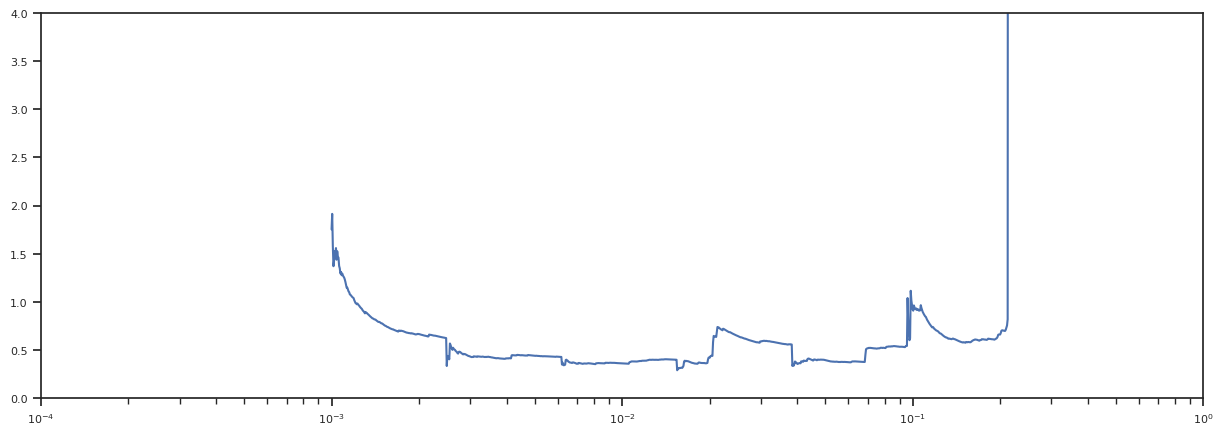

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.ylim(0, 4)
plt.xlim(1e-4, 1)
plt.show()